***Copyright © 2021 Robbie Cummins***

    This file is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This file is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this file.  If not, see <https://github.com/macrohumanity> or <https://www.gnu.org/licenses/>.

In [2]:
# importing necessary libraries 
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

#reading-in target dataset
df = pd.read_csv('/home/wobbalinux/Desktop/Potential Projects/Kentucky Inventory of Mindfulness Skills Responses/data.csv')


# FUNCTION : preparing for reverse scoring of specified items
# according to the KIMS scoring instructions
def reverse_score(num):
        if num == int(1):
            return int(5)
        if num == int(2):
            return int(4)
        if num == int(3):
            return int(3)
        if num == int(4):
            return int(2)
        if num == int(5):
            return int(1)
        
        
# FUNCTION EXECUTION : reverse scoring of specified items  
df['Q3'] = df['Q3'].apply(reverse_score)
df['Q4'] = df['Q4'].apply(reverse_score)
df['Q8'] = df['Q8'].apply(reverse_score)
df['Q11'] = df['Q11'].apply(reverse_score)
df['Q12'] = df['Q12'].apply(reverse_score)
df['Q14'] = df['Q14'].apply(reverse_score)
df['Q16'] = df['Q16'].apply(reverse_score)
df['Q18'] = df['Q18'].apply(reverse_score)
df['Q20'] = df['Q20'].apply(reverse_score)
df['Q22'] = df['Q22'].apply(reverse_score)
df['Q23'] = df['Q23'].apply(reverse_score)
df['Q24'] = df['Q24'].apply(reverse_score)
df['Q27'] = df['Q27'].apply(reverse_score)
df['Q28'] = df['Q28'].apply(reverse_score)
df['Q31'] = df['Q31'].apply(reverse_score)
df['Q32'] = df['Q32'].apply(reverse_score)
df['Q35'] = df['Q35'].apply(reverse_score)
df['Q36'] = df['Q36'].apply(reverse_score)


# replacing original numerical gender assignment (1,2) with labeled gender assignment (male,female)
# NOTE : 1 = male, 2 = female
# NOTE : subjects 136,227,404,583,142,237,244,276 had marked '0' or '3' as their gender -- interpreted as 'not specified'
df['gender'] = df['gender'].replace([1,2,0,3],['male','female','not specified','not specified'])


# double-checking to see if original data collectors reversed scored when calculating average skill scores
# conclusion -- they did not.
# NOTE: df['observing'] contains no reverse scoring according to KIMS scoring instructions -- no need to create new average
df['describing'] = round(((df['Q2']+df['Q6']+df['Q10']+df['Q14']+df['Q18']+df['Q22']+df['Q26']+df['Q34'])/8),1)
df['acting'] = round(((df['Q3']+df['Q7']+df['Q11']+df['Q15']+df['Q19']+df['Q23']+df['Q27']+df['Q31']+df['Q35']+df['Q38'])/10),1)
df['accepting'] = round(((df['Q4']+df['Q8']+df['Q12']+df['Q16']+df['Q20']+df['Q24']+df['Q28']+df['Q32']+df['Q36'])/9),1)


# isolating target data for upcoming visualizations
alt = df[['observing','describing','accepting','acting','age','gender']]


# FUNCTION : creating a new 'age group' series
def age_groups(age):
    if age in range(14,19):
        return 'adolescence'
    if age in range(19,35):
        return 'early adulthood'
    if age in range(35,45):
        return 'early middle age'
    if age in range(45,65):
        return 'late middle age'
    if age in range(65,101):
        return 'late adulthood'
    

# FUNCTION EXECUTION : creation of 'age group' series
alt['age group'] = alt['age'].apply(age_groups)




<ipython-input-2-d9d2bce03b19>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alt['age group'] = alt['age'].apply(age_groups)


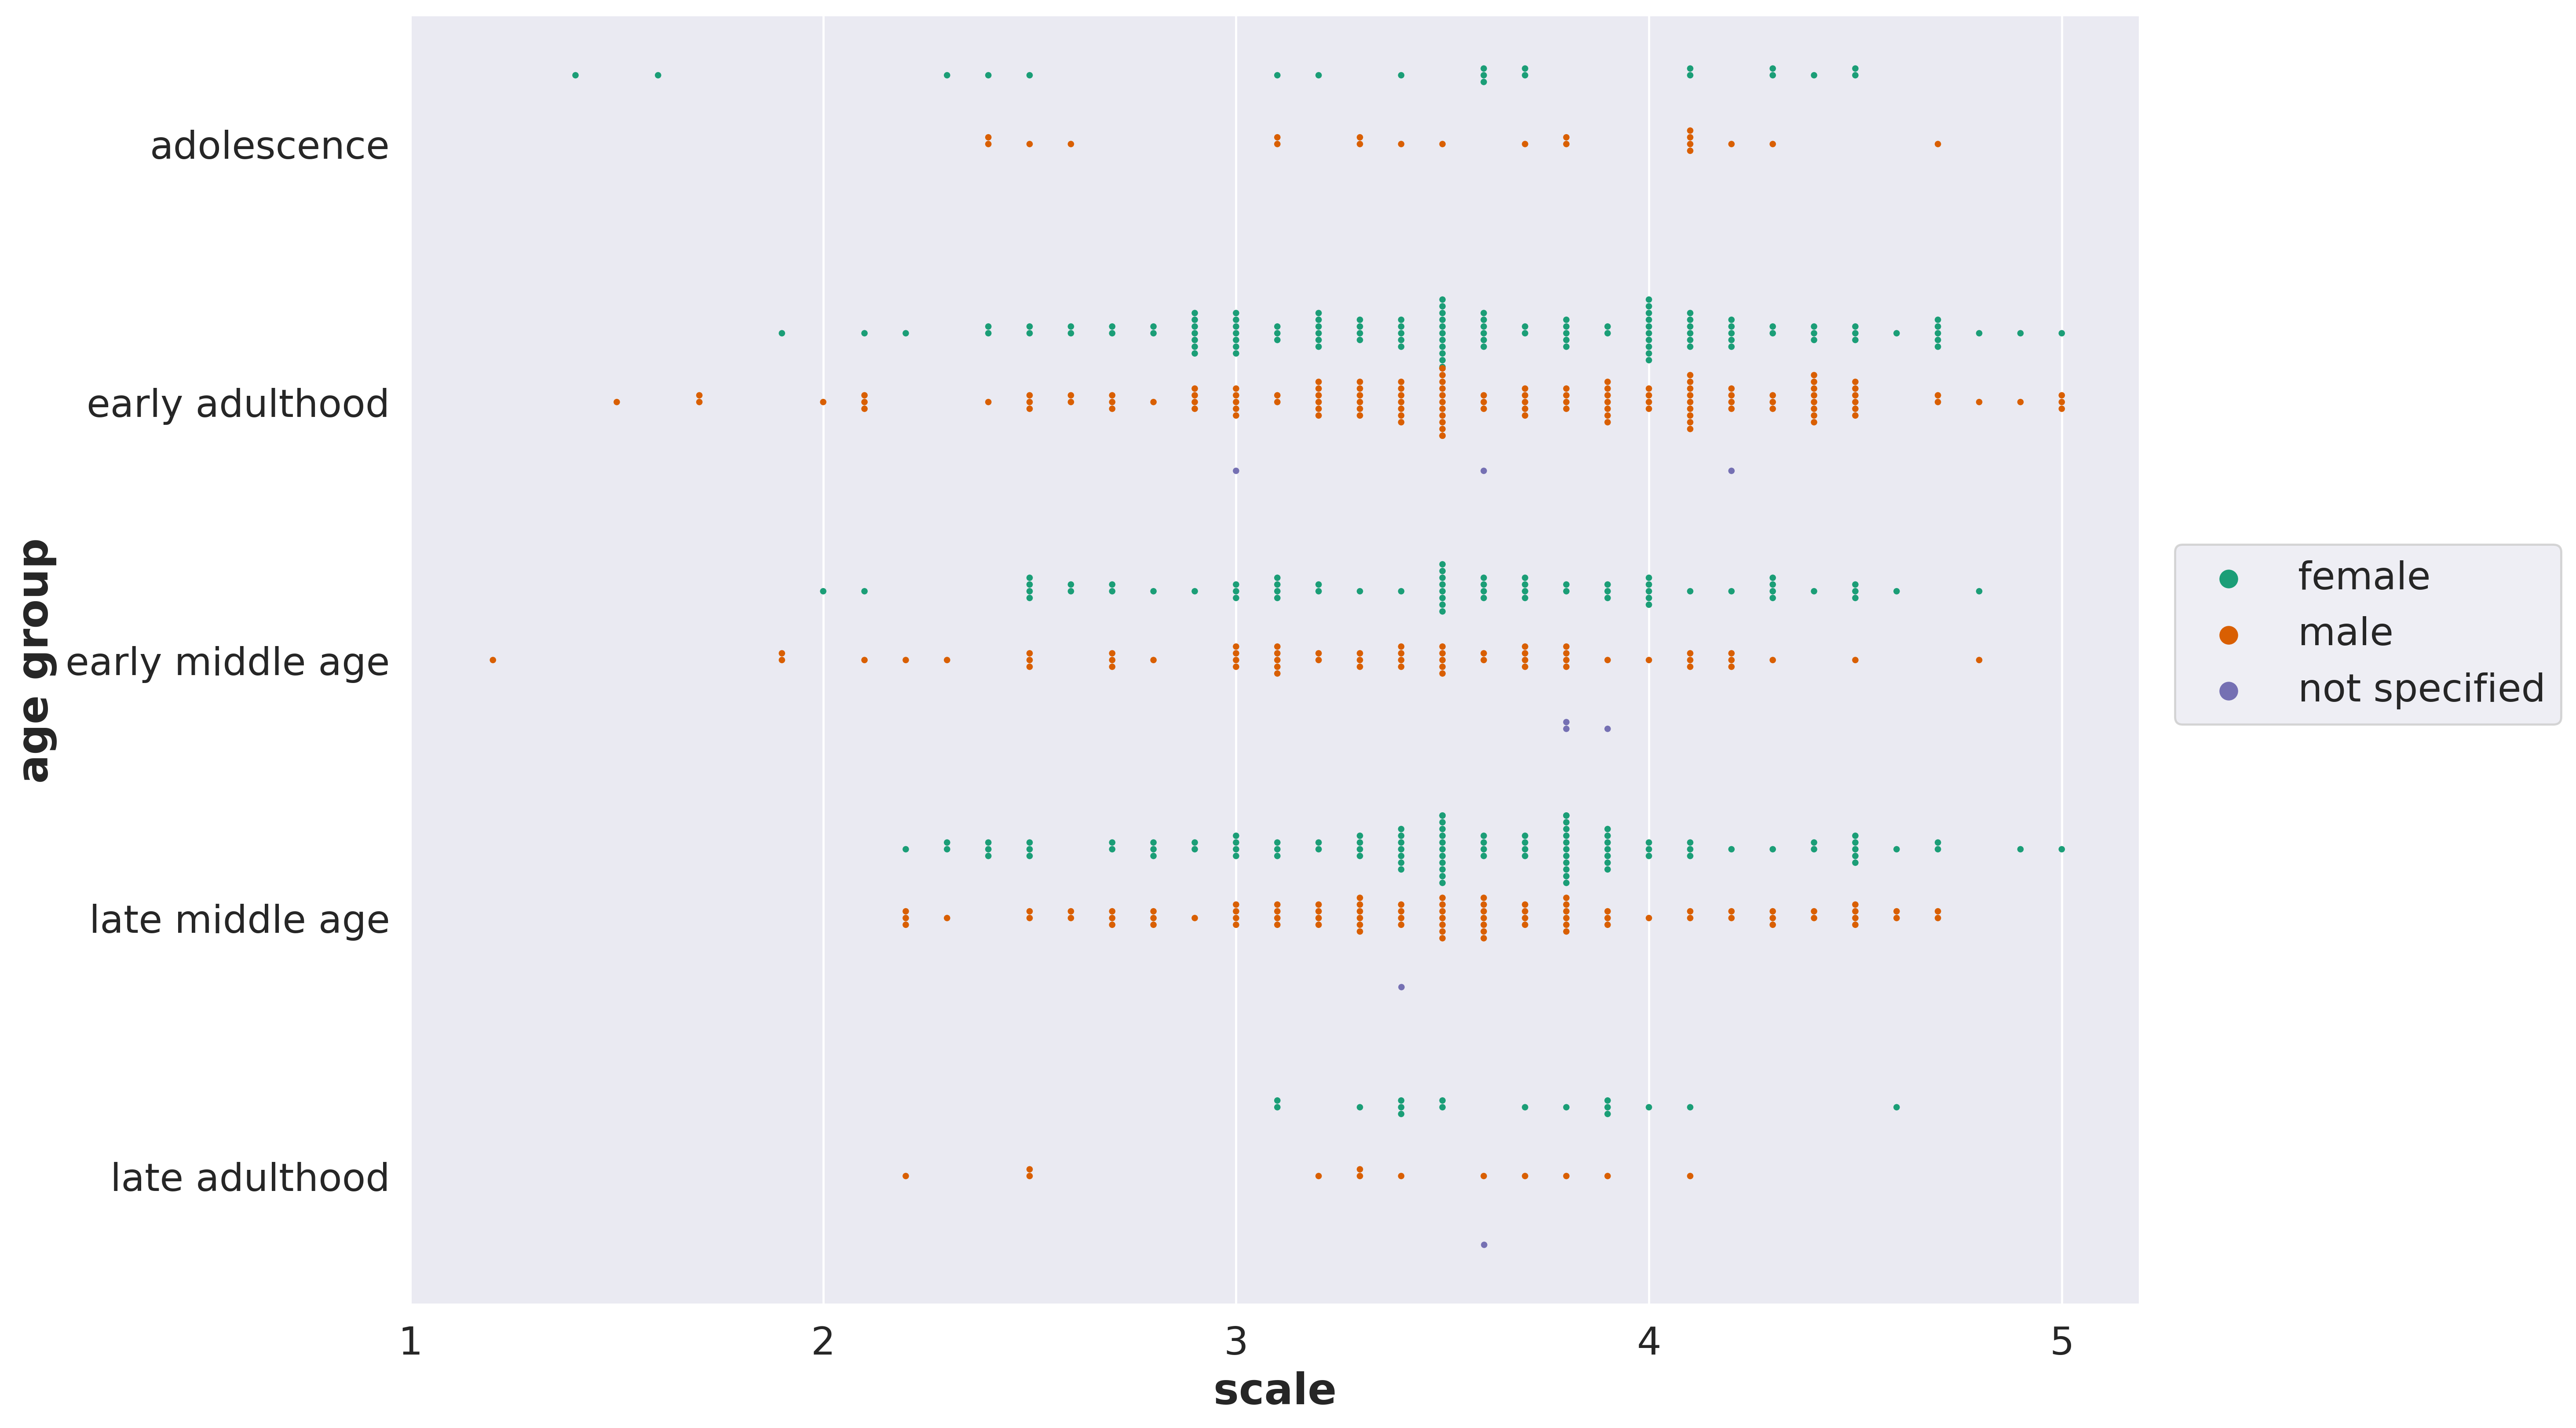

In [6]:
# OBSERVE SUBSCALE - Age Group and Gender Comparison
# NOTE: 1 = Never or very rarely true
# NOTE: 2 = Rarely true
# NOTE: 3 = Sometimes true
# NOTE: 4 = Often true
# NOTE: 5 = Very often or always true

plt.figure(figsize=(14.5,11.1),dpi=350)
sns.set(style='darkgrid')
sns.swarmplot(x='observing',y='age group',hue='gender',data=alt,size=3,dodge=True,
             order=['adolescence','early adulthood','early middle age','late middle age',
                    'late adulthood'],palette='Dark2')
# plt.title('Observe Subscale',size=21.5,fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('scale',size=(20),fontweight='bold')
plt.xticks([1,2,3,4,5])
plt.ylabel('age group',size=(20),fontweight='bold')
plt.legend(loc=(1.02,.45),fontsize=18)

plt.savefig('/home/wobbalinux/Desktop/Potential Projects/Kentucky Inventory of Mindfulness Skills Responses/All Item Visuals/Observe.jpg',bbox_inches='tight')

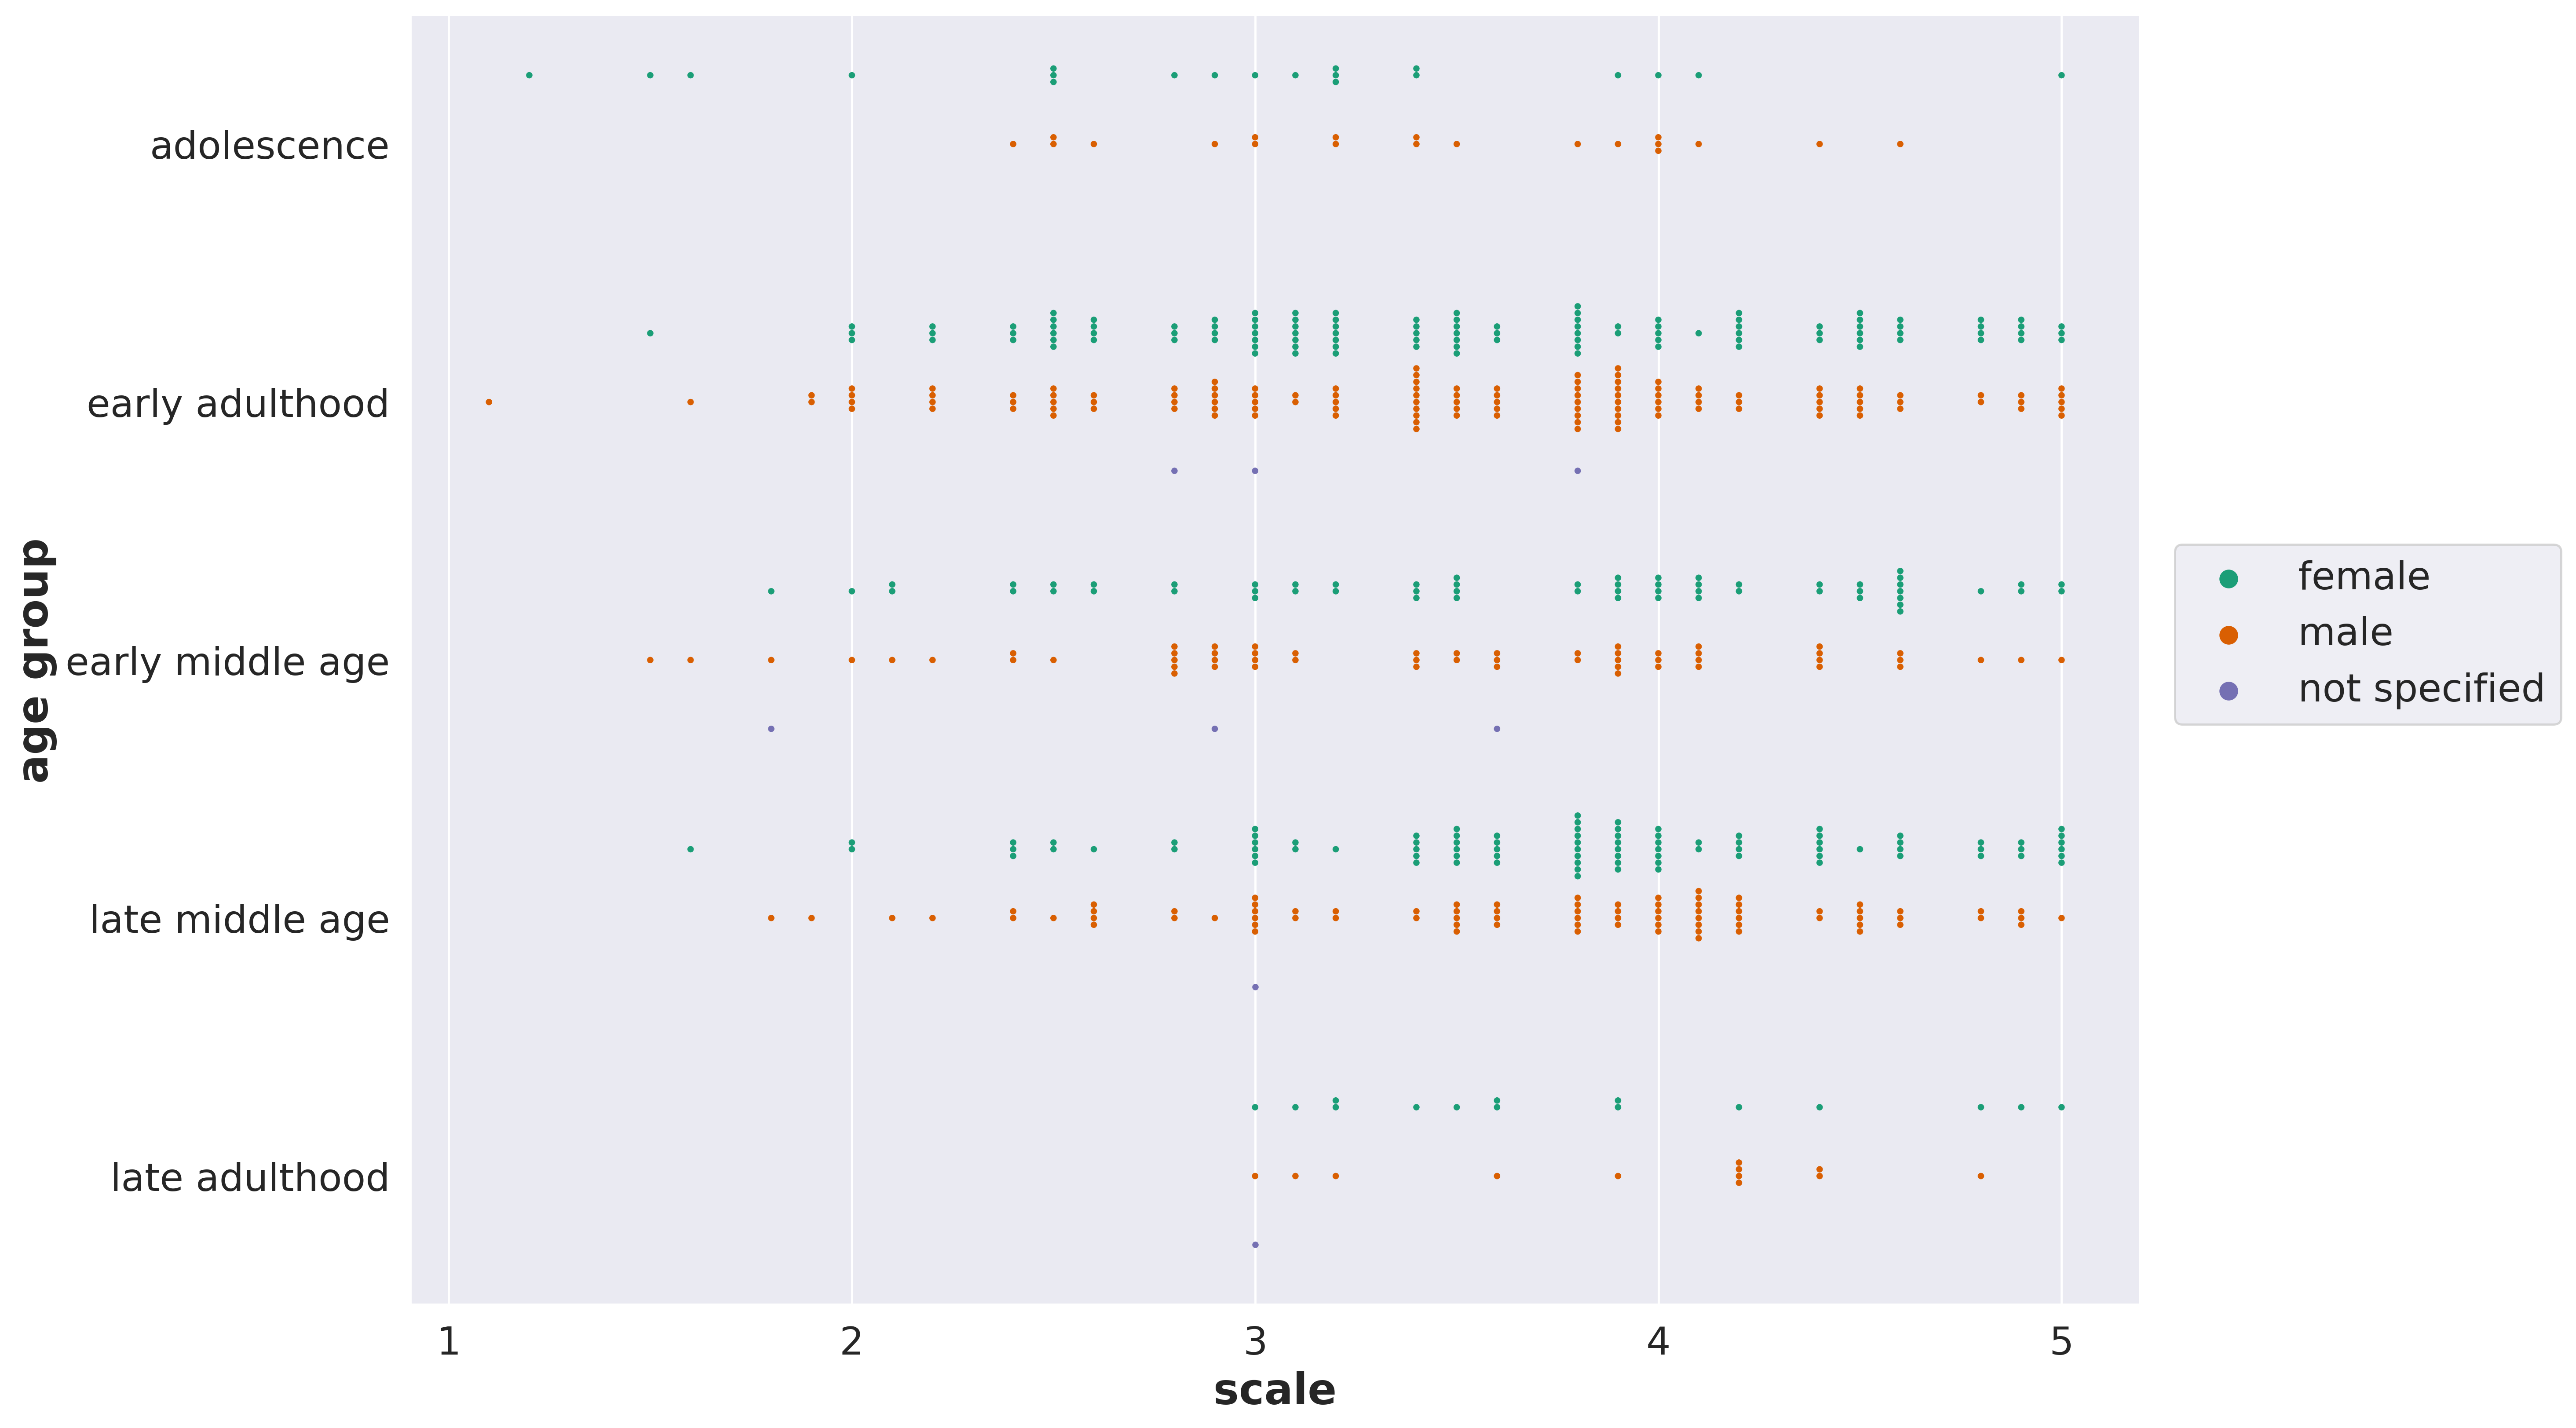

In [7]:
# DESCRIBE SUBSCALE - Age Group and Gender Comparison
# NOTE: 1 = Never or very rarely true
# NOTE: 2 = Rarely true
# NOTE: 3 = Sometimes true
# NOTE: 4 = Often true
# NOTE: 5 = Very often or always true

plt.figure(figsize=(14.5,11.1),dpi=350)
sns.swarmplot(x='describing',y='age group',hue='gender',data=alt,size=3,dodge=True,
             order=['adolescence','early adulthood','early middle age','late middle age',
                    'late adulthood'],palette='Dark2')
# plt.title('Describe Subscale',size=21.5,fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('scale',size=(20),fontweight='bold')
plt.xticks([1,2,3,4,5])
plt.ylabel('age group',size=(20),fontweight='bold')
plt.legend(loc=(1.02,.45),fontsize=18)

plt.savefig('/home/wobbalinux/Desktop/Potential Projects/Kentucky Inventory of Mindfulness Skills Responses/All Item Visuals/Describe.jpg',bbox_inches='tight')

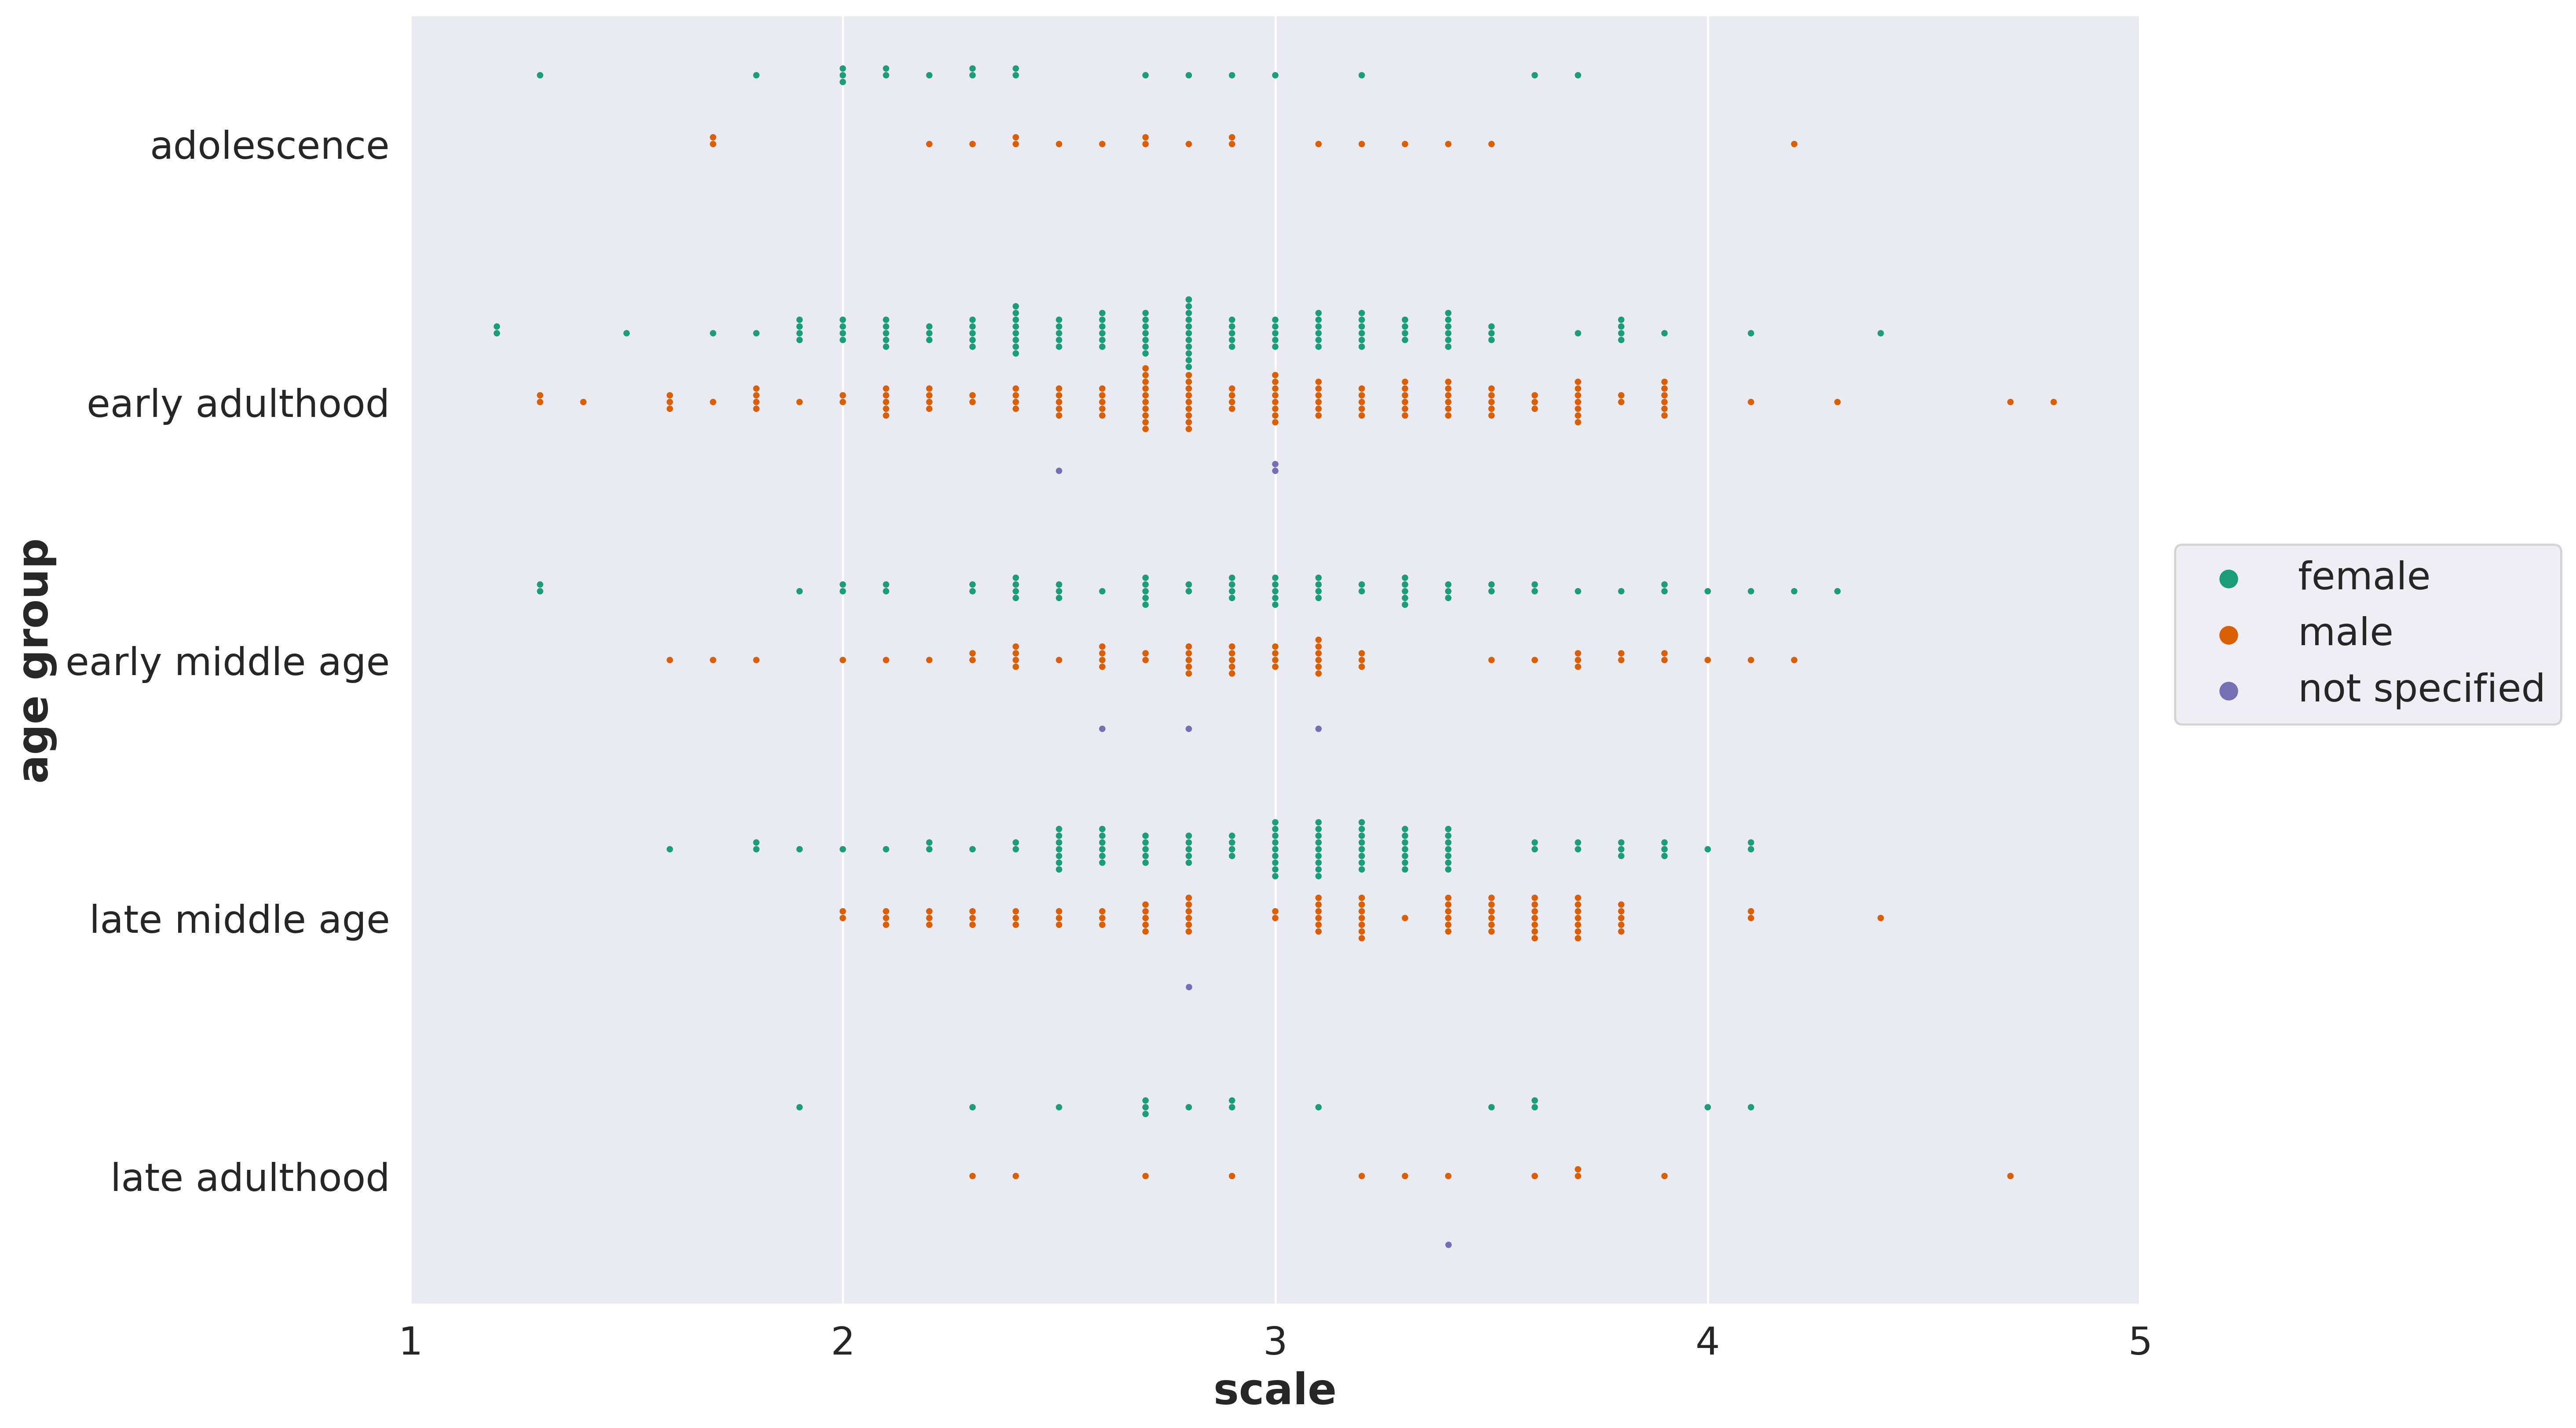

In [8]:
# ACT WITH AWARENESS SUBSCALE - Age Group and Gender Comparison
# NOTE: 1 = Never or very rarely true
# NOTE: 2 = Rarely true
# NOTE: 3 = Sometimes true
# NOTE: 4 = Often true
# NOTE: 5 = Very often or always true

plt.figure(figsize=(14.5,11.1),dpi=350)
sns.swarmplot(x='acting',y='age group',hue='gender',data=alt,size=3,dodge=True,
             order=['adolescence','early adulthood','early middle age','late middle age',
                    'late adulthood'],palette='Dark2')
#plt.title('Act With Awareness Subscale',size=21.5,fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('scale',size=(20),fontweight='bold')
plt.xticks([1,2,3,4,5])
plt.ylabel('age group',size=(20),fontweight='bold')
plt.legend(loc=(1.02,.45),fontsize=18)

plt.savefig('/home/wobbalinux/Desktop/Potential Projects/Kentucky Inventory of Mindfulness Skills Responses/All Item Visuals/Act With Awareness.jpg',bbox_inches='tight')

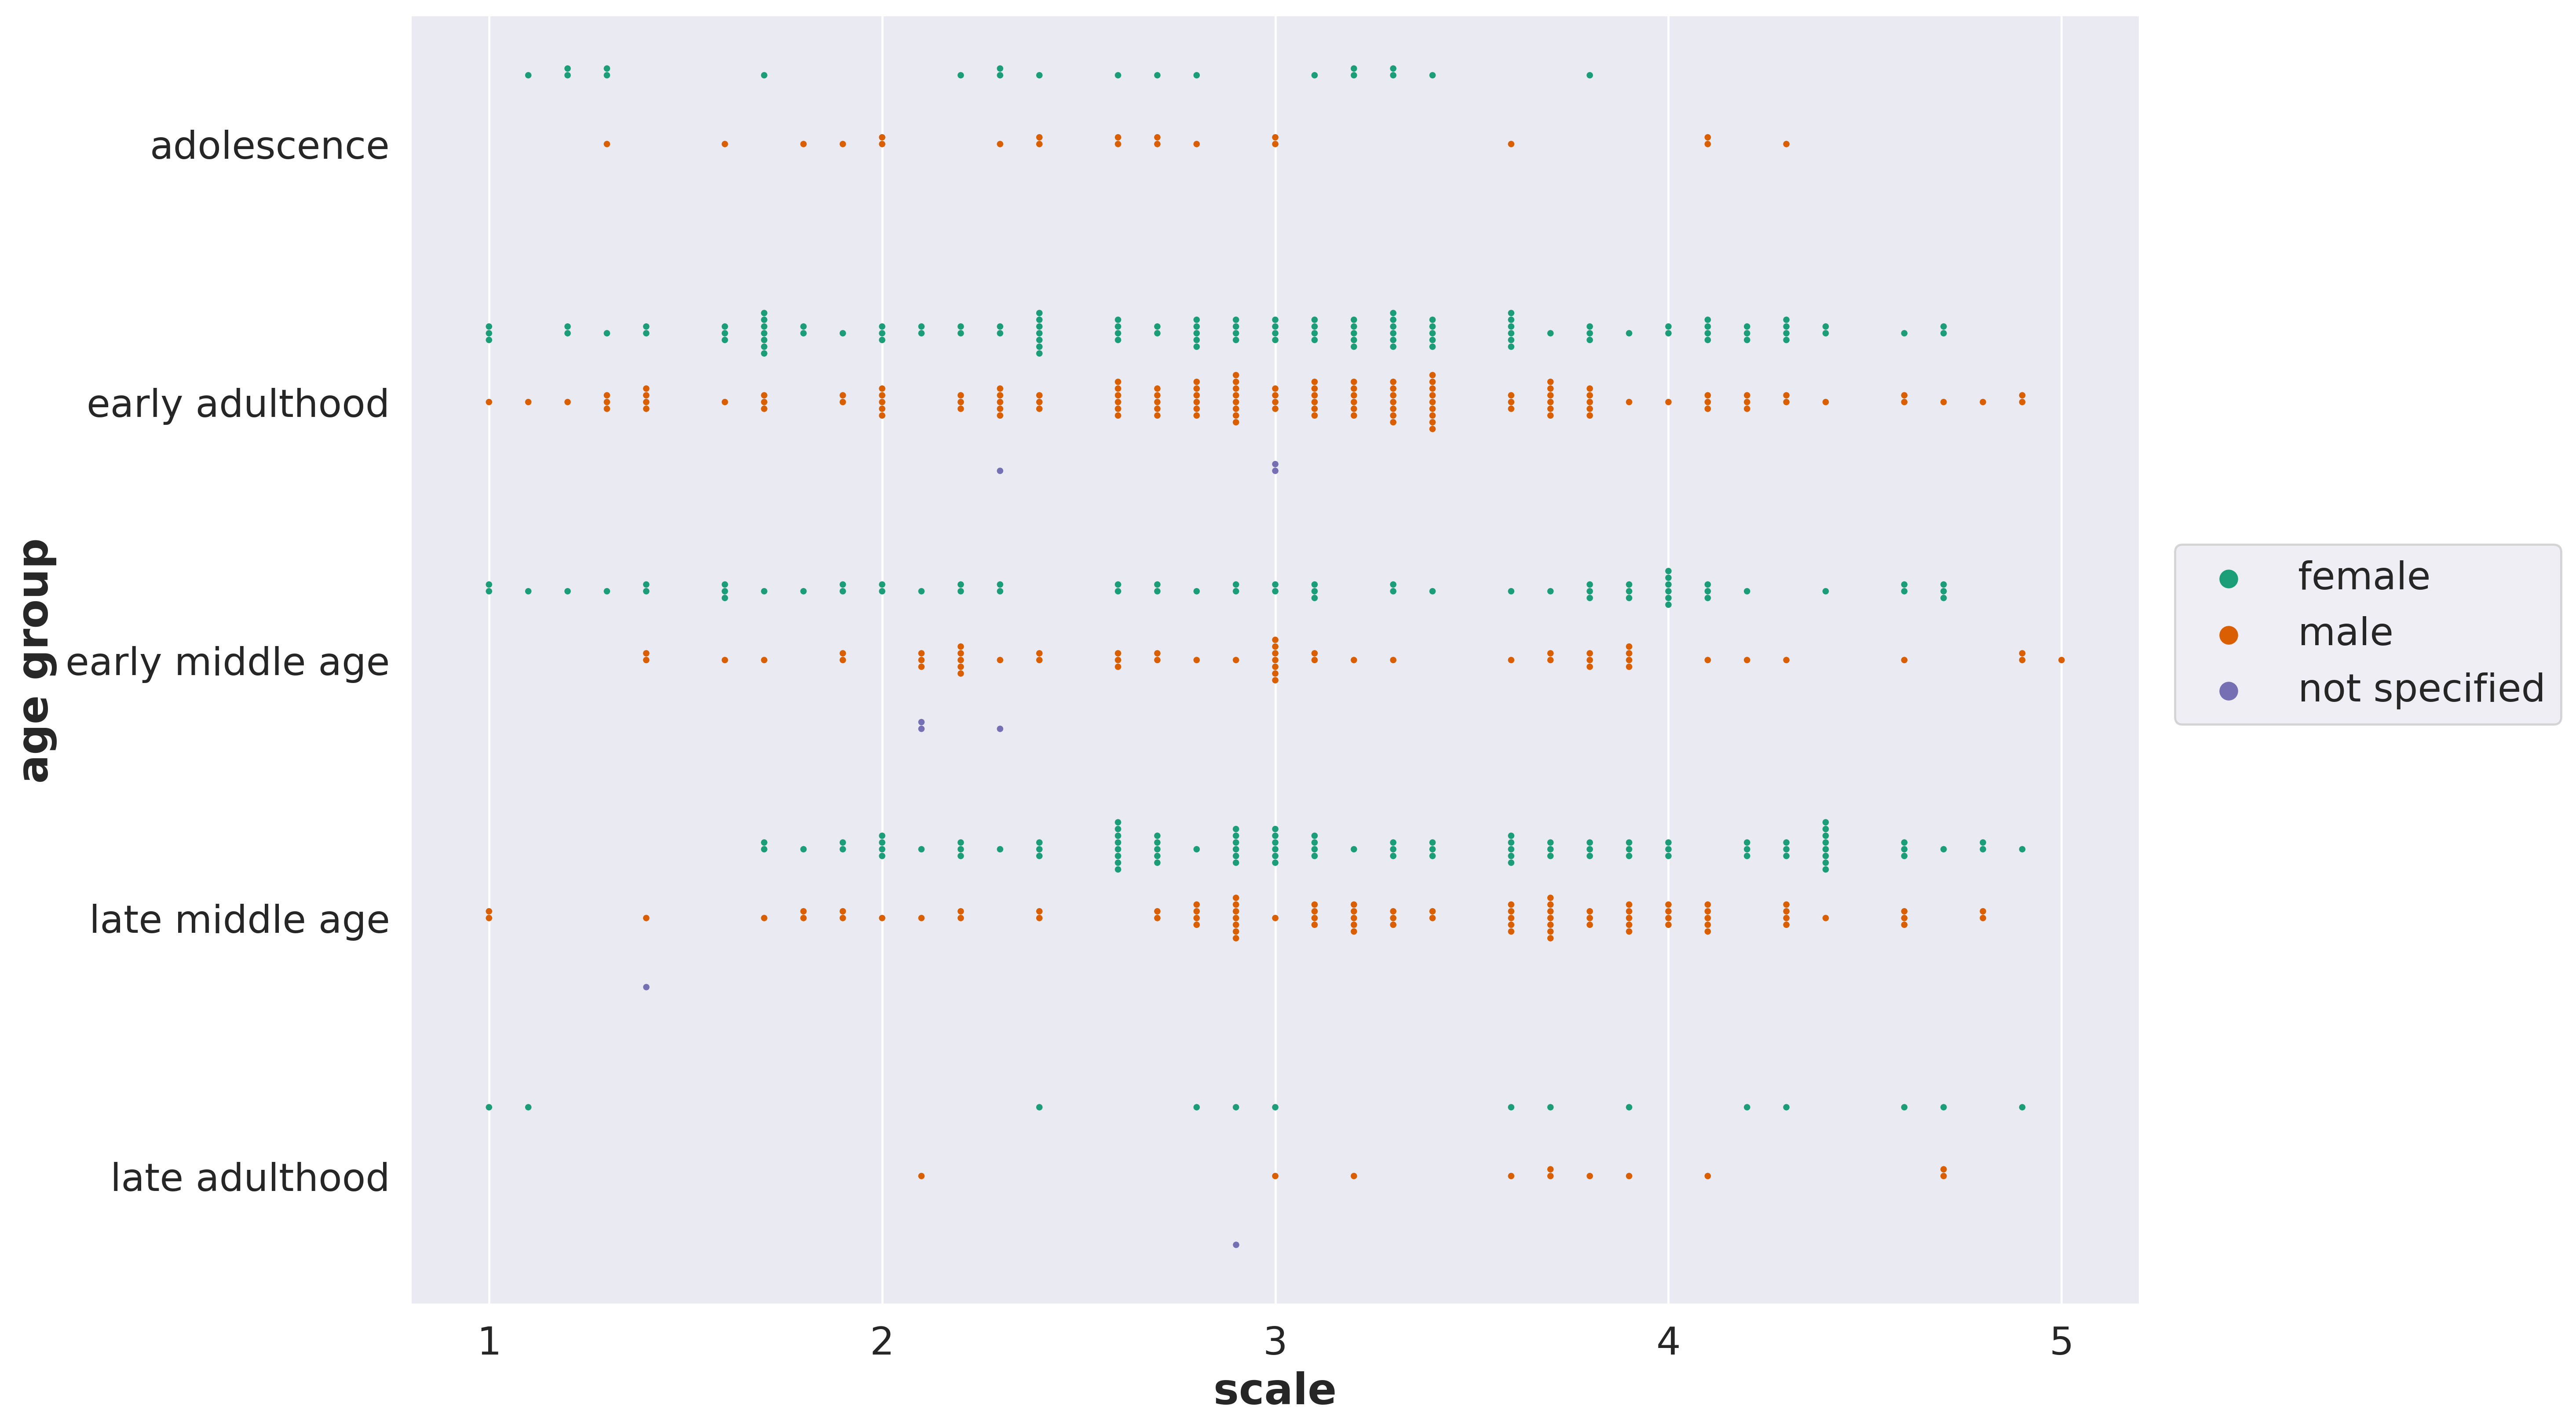

In [9]:
# ACCEPT WITHOUT JUDGMENT SUBSCALE - Age Group and Gender Comparison
# NOTE: 1 = Never or very rarely true
# NOTE: 2 = Rarely true
# NOTE: 3 = Sometimes true
# NOTE: 4 = Often true
# NOTE: 5 = Very often or always true

plt.figure(figsize=(14.5,11.1),dpi=350)
sns.swarmplot(x='accepting',y='age group',hue='gender',data=alt,size=3,dodge=True,
             order=['adolescence','early adulthood','early middle age','late middle age',
                    'late adulthood'],palette='Dark2')
#plt.title('Accept Without Judgment Subscale',size=21.5,fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('scale',size=(20),fontweight='bold')
plt.xticks([1,2,3,4,5])
plt.ylabel('age group',size=(20),fontweight='bold')
plt.legend(loc=(1.02,.45),fontsize=18)

plt.savefig('/home/wobbalinux/Desktop/Potential Projects/Kentucky Inventory of Mindfulness Skills Responses/All Item Visuals/Accept Without Judgment.jpg',bbox_inches='tight')

In [63]:
# rearranging data frame for compatibility with upcoming seaborn clustermap visualization
cluster = alt.drop(['age','gender'],axis=1).groupby('age group').mean()
cluster = cluster.reindex(index=['adolescence','early adulthood','early middle age',
                'late middle age','late adulthood'],columns=['observing','describing',
                                                        'acting','accepting'])
cluster.columns = ['observing','describing','act w/ awareness','accept w/o judgment']

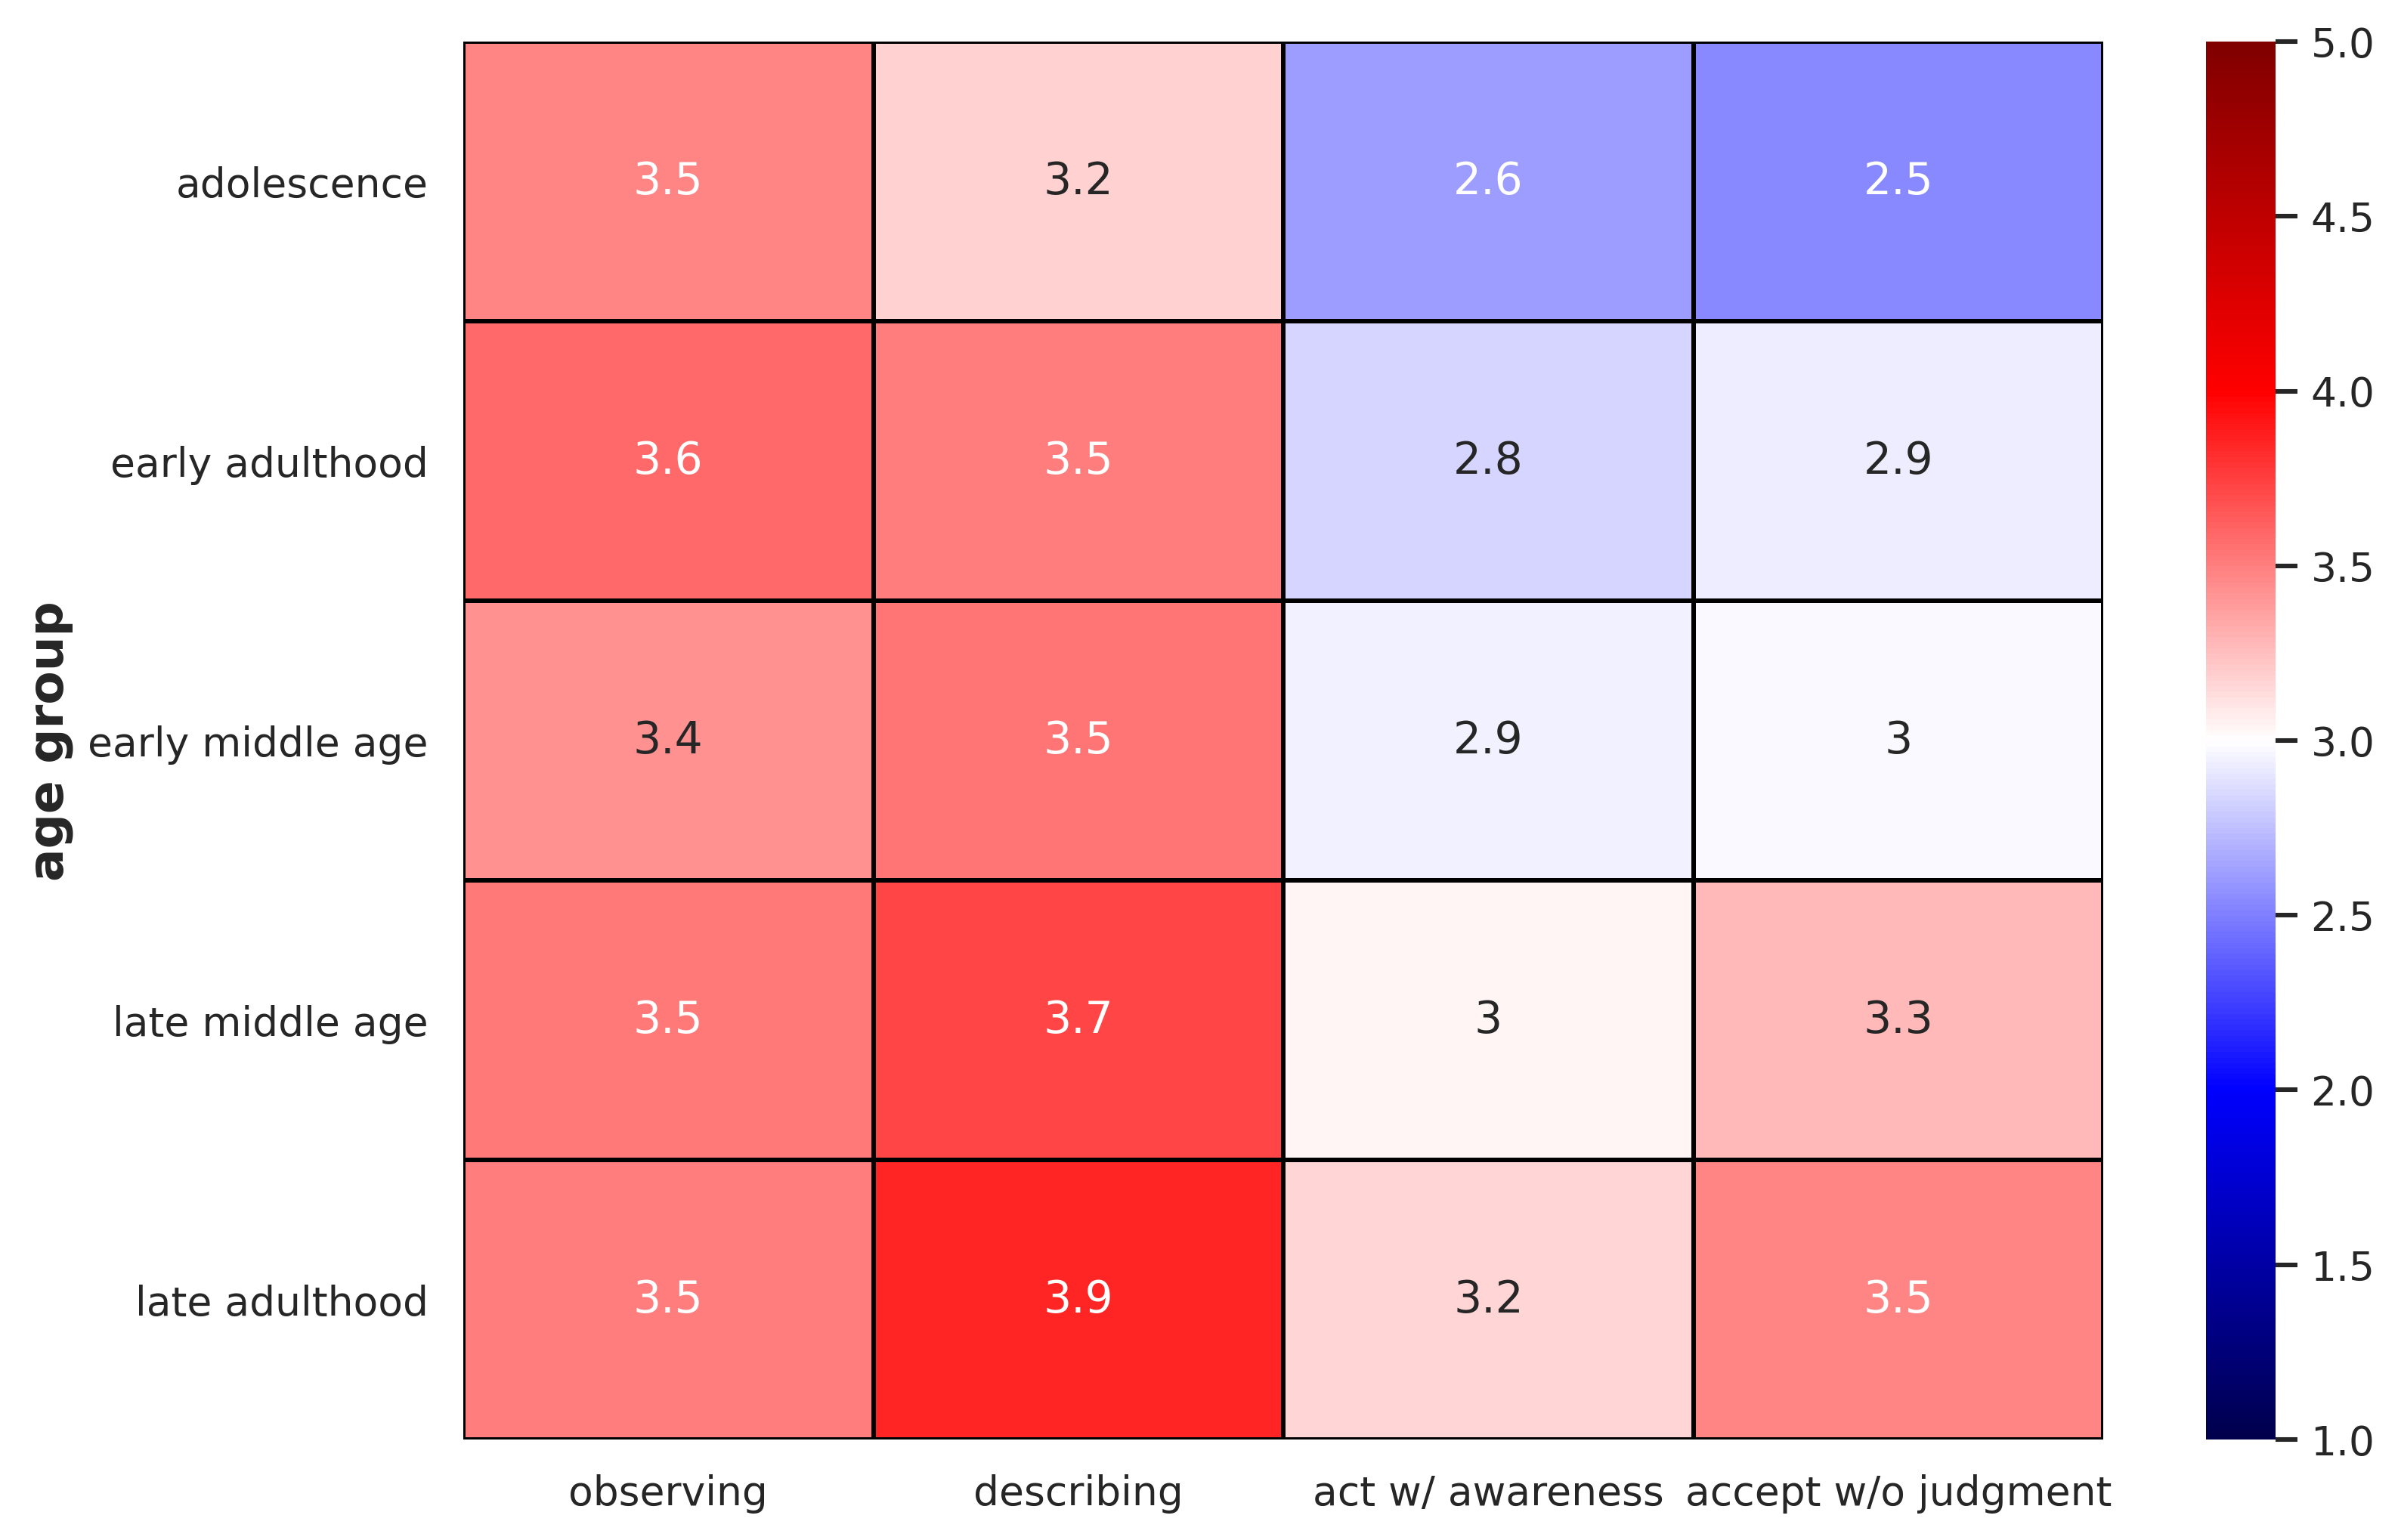

In [64]:
# age group comparison to all four mindfulness skills at once
# NOTE: 1 = Never or very rarely true
# NOTE: 2 = Rarely true
# NOTE: 3 = Sometimes true
# NOTE: 4 = Often true
# NOTE: 5 = Very often or always true

plt.figure(dpi=350,figsize=(10,7))
sns.heatmap(data=cluster,linewidth=1,annot=True,linecolor='black',cmap='seismic',vmin=1,vmax=5)
plt.ylabel('age group',size=13.3,fontweight='bold')
plt.savefig('/home/wobbalinux/Desktop/Potential Projects/Kentucky Inventory of Mindfulness Skills Responses/All Item Visuals/Age Group V. Subscales.jpg',bbox_inches='tight')

***Results from PSPP Cronbach's Alpha Tests***

In [2]:
# data frame creation in order to better depict potential differences in reliability coefficients in an eight year timespan
data = [[.84,.91,.83,.87],[.86,.89,.81,.91]]
cronbach = np.array(data)
mind_index = ['2004','2012']
mind_columns = ['observe','describe','act with awareness','accept without judgment']
df = pd.DataFrame(data=cronbach,index=mind_index,columns=mind_columns)
df

,observe,describe,act with awareness,accept without judgment
2004,0.84,0.91,0.83,0.87
2012,0.86,0.89,0.81,0.91


Resource : Colormap : https://matplotlib.org/stable/gallery/color/colormap_reference.html